In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [22]:
%matplotlib inline

In [24]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']

In [26]:
df = pd.read_excel("Y:/BaiduSyncdisk/YAO_2023/Apple/原始数据/git_repo/Apple-survey/data/raw_data_total/raw_data_english_total.xlsx")

C:\Users\18691\AppData\Local\Temp\ipykernel_163992\955819375.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
C:\Users\18691\AppData\Local\Temp\ipykernel_163992\955819375.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
C:\Users\18691\AppData\Local\Temp\ipykernel_163992\955819375.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14,  fontweight='bold')
C:\Users\18691\AppData\Local\Temp\ipykernel_163992\955819375.py:85: UserWarning: set_ticklabels() should only be used with a f

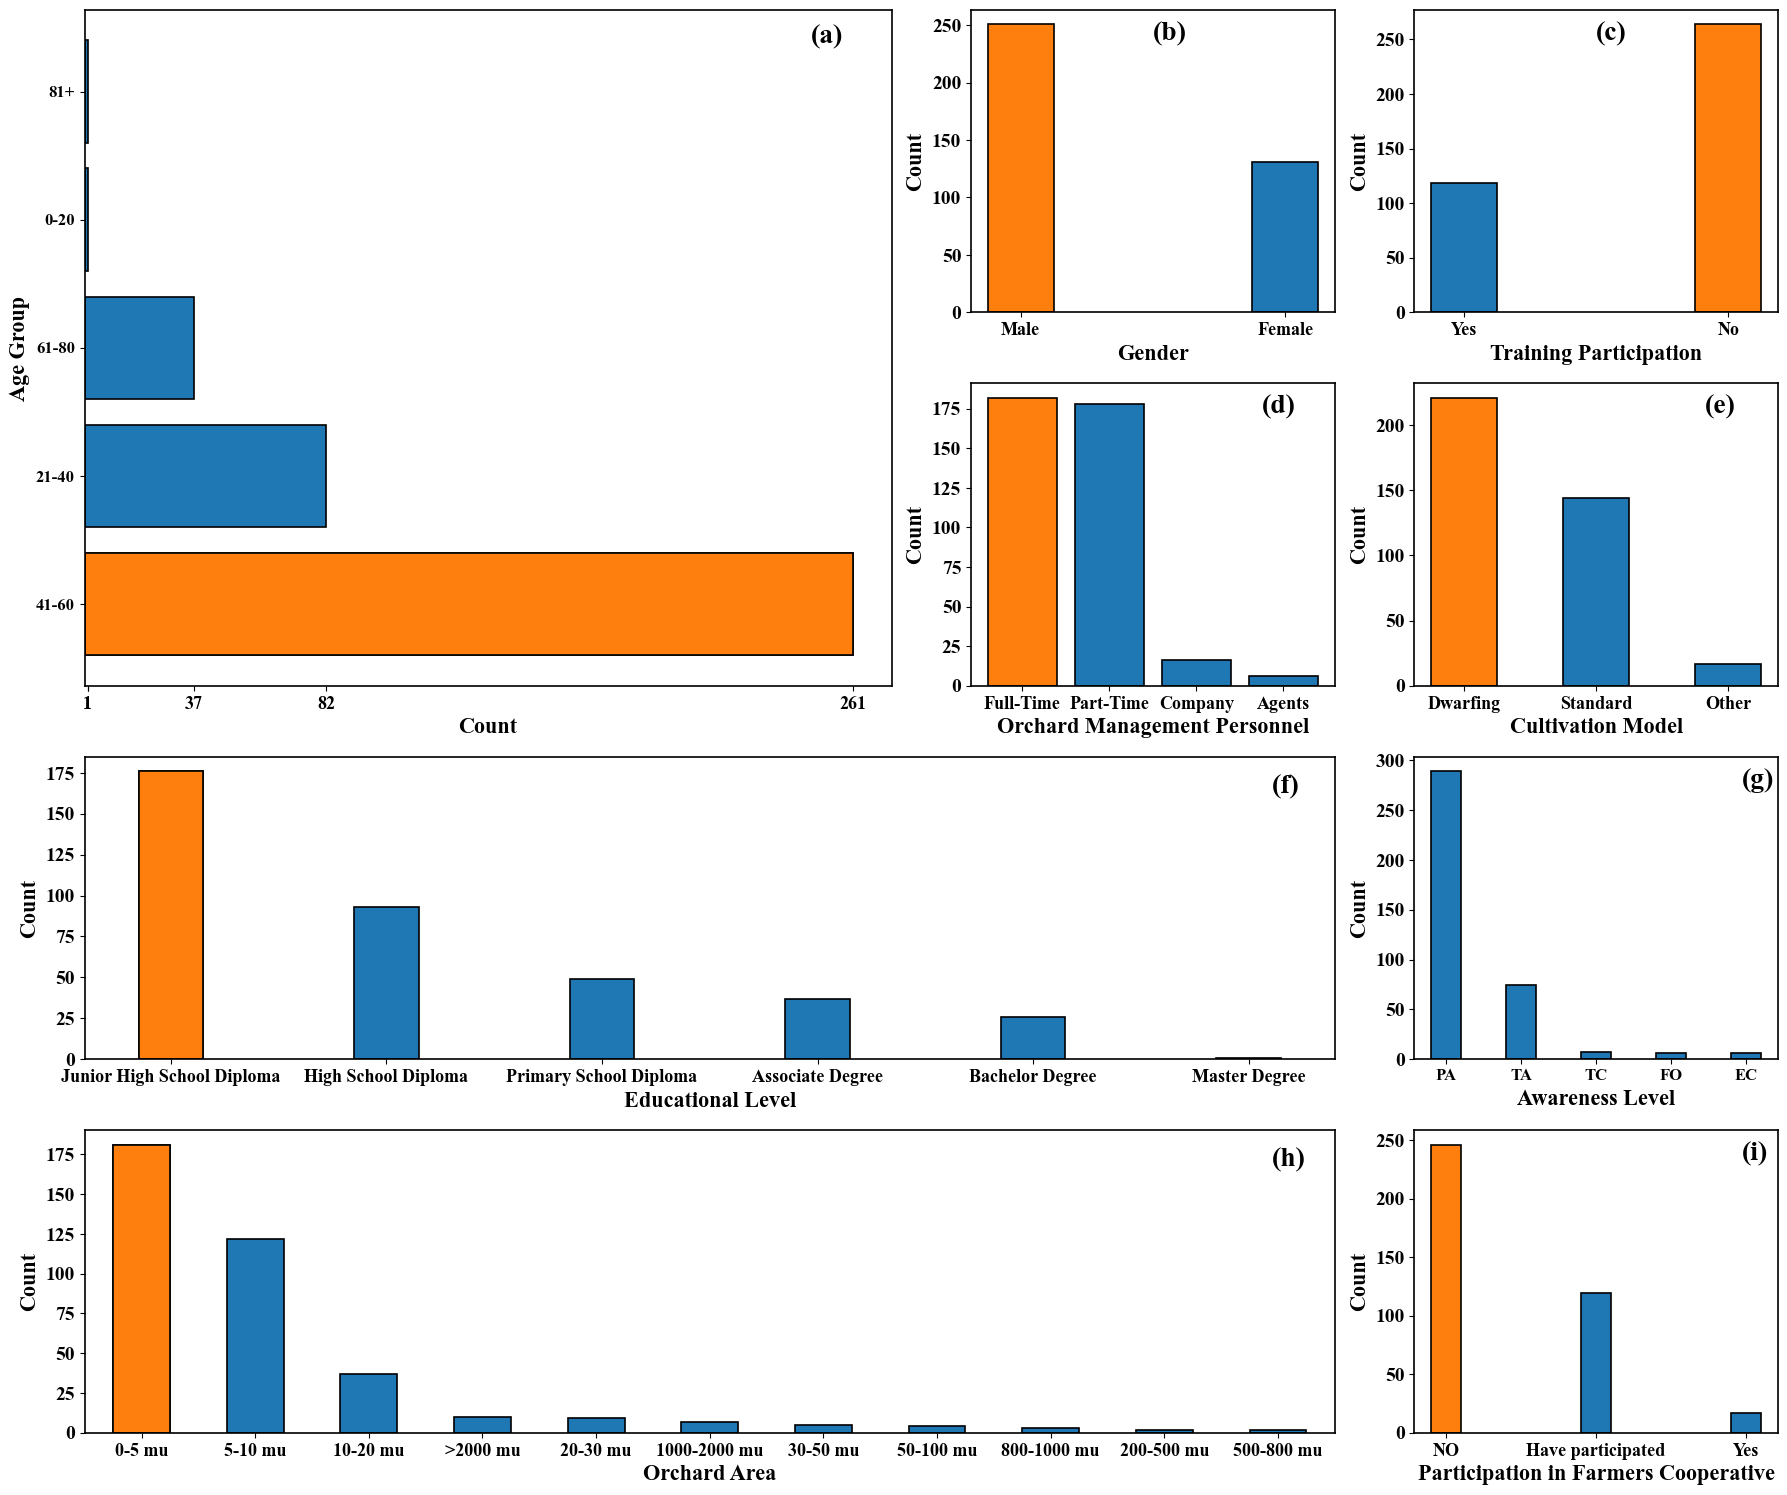

In [27]:
fig = plt.figure(figsize=(18, 22))
gs = fig.add_gridspec(6, 4)

# 绘制"Age"的条形图
ax1 = fig.add_subplot(gs[:2, :2])
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
ages = pd.cut(df['3.Age'], bins=bins, labels=labels, right=False)
age_counts = ages.value_counts()
sorted_ages = age_counts.sort_values(ascending=False)
ax1.barh(range(len(sorted_ages)), sorted_ages.values, color='tab:blue', edgecolor='black', linewidth=1.2)
ax1.barh(sorted_ages.index.tolist().index('41-60'), sorted_ages['41-60'], color='tab:orange', edgecolor='black', linewidth=1.2)
ax1.set_yticks(range(len(sorted_ages)))
ax1.set_yticklabels(sorted_ages.index, fontsize=12, fontweight='bold')
ax1.set_xticks(sorted_ages.values)
ax1.set_xticklabels([str(int(count)) for count in sorted_ages.values], fontsize=12, fontweight='bold')
ax1.set_xlabel('Count', fontsize=16, fontweight='bold')
ax1.set_ylabel('Age Group', fontsize=16, fontweight='bold')
ax1.annotate('(a)', xy=(0.9, 0.95), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Gender"的条形图
ax2 = fig.add_subplot(gs[0, 2])
male_count = df['2.Gender'].value_counts().get('Male', 0)
female_count = df['2.Gender'].value_counts().get('Female', 0)
categories = ['Male', 'Female']
ax2.bar(categories, [male_count, female_count], color=['tab:orange', 'tab:blue'], label=['Male', 'Female'], width=0.25, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Gender', fontsize=16, fontweight='bold')
ax2.set_xticks(range(len(categories)))
ax2.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax2.get_yticks()
ax2.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax2.annotate('(b)', xy=(0.5, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Have you participated in professional agricultural skills training?"的条形图
ax3 = fig.add_subplot(gs[0, 3])
yes_count = df['10.Have you participated in professional agricultural skills training?'].value_counts().get('Yes', 0)
no_count = df['10.Have you participated in professional agricultural skills training?'].value_counts().get('No', 0)
categories = ['Yes', 'No']
ax3.bar(categories, [yes_count, no_count], color=['tab:blue', 'tab:orange'], label=['Yes', 'No'], width=0.25, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Training Participation', fontsize=16, fontweight='bold')
ax3.set_xticks(range(len(categories)))
ax3.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax3.get_yticks()
ax3.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax3.annotate('(c)', xy=(0.5, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Profile of Orchard Management Personnel"的条形图
ax4 = fig.add_subplot(gs[1, 2])
profile_counts = df['14.Profile of Orchard Management Personnel'].value_counts()
new_labels = {
    'Orchard Owner Manages the Orchard Full-time': 'Full-Time',
    'Orchard Owner Manages the Orchard Part-time': 'Part-Time',
    'Corporate Base under a Company System': 'Company',
    'Managed by Hired Managers/Agents': 'Agents'
}
profile_counts.index = [new_labels.get(label, label) for label in profile_counts.index]
colors_and_labels = {
    'Full-Time': 'tab:orange',
    'Part-Time': 'tab:blue',
    'Company': 'tab:blue',
    'Agents': 'tab:blue'
}
color_list = [colors_and_labels[label] for label in profile_counts.index]
labels_list = list(profile_counts.index) 
ax4.bar(profile_counts.index, profile_counts.values, color=color_list, edgecolor='black', linewidth=1.2)
ax4.set_xlabel('Orchard Management Personnel', fontsize=16, fontweight='bold')
ax4.set_xticks(range(len(profile_counts)))
ax4.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax4.get_yticks()
ax4.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14,  fontweight='bold')
ax4.annotate('(d)', xy=(0.8, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Cultivation Model"的条形图
ax5 = fig.add_subplot(gs[1, 3])
dwarf_count = df['16.Cultivation Model'].value_counts().get('Dwarfing and Dense Planting', 0)
standard_count = df['16.Cultivation Model'].value_counts().get('Standard Tree and Sparse Planting', 0)
other_count = df['16.Cultivation Model'].value_counts().get('Other', 0)
categories = ['Dwarfing', 'Standard', 'Other']
ax5.bar(categories, [dwarf_count, standard_count,other_count], color=['tab:orange', 'tab:blue', 'tab:blue'], 
        label=['Dwarfing and Dense Planting',  'Standard Tree and Sparse Planting','Other'], width=0.5, edgecolor='black', linewidth=1.2)
ax5.set_xlabel('Cultivation Model', fontsize=16, fontweight='bold')
ax5.set_xticks(range(len(categories)))
ax5.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax5.get_yticks()
ax5.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax5.annotate('(e)', xy=(0.8, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Educational Level"的条形图
ax6 = fig.add_subplot(gs[2:3, :3])
education_categories = ['Junior High School Diploma', 'High School Diploma', 'Associate Degree', 'Primary School Diploma', 'Bachelor Degree', 'Master Degree']
education_values = df['4.Educational Level'].value_counts()
education_values.plot(kind='bar', ax=ax6, color='tab:blue', width=0.3, edgecolor='black', linewidth=1.2)
ax6.bar(education_categories.index(education_categories[0]), education_values[education_categories[0]], color='tab:orange', width=0.3, edgecolor='black', linewidth=1.2)
ax6.set_xlabel('Educational Level', fontsize=16, fontweight='bold')
ax6.set_xticks(range(len(education_categories)))
ax6.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax6.get_yticks()
ax6.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax6.annotate('(f)', xy=(0.95, 0.88), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"The Level of Awareness of Pest and Disease Control"的条形图
ax7 = fig.add_subplot(gs[2:3, 3:4])

awareness_counts = df['32.The Level of Awareness of Pest and Disease Control'].value_counts()
new_labels = {
    'Following Others Pest and Disease Control Strategies': 'FO',
    'Behavior of Preventive Fungicide Application': 'PA',
    'Lacking Preventive Fungicide Application Behavior, Only Treating Pests and Diseases Once They Manifest': 'TA',
    'Possessing the Awareness of Preventive Fungicide Application but Lacking Economic Capacity': 'EC',
    'Possessing the Awareness of Preventive Fungicide Application but Lacking the Time to Implement It. ': 'TC'
}
awareness_counts.index = [new_labels.get(label, label) for label in awareness_counts.index]
color_list = ['tab:blue' if label != 'Preventive application' else 'tab:orange' for label in awareness_counts.index]
ax7.bar(awareness_counts.index, awareness_counts.values, color=color_list, width=0.4, edgecolor='black', linewidth=1.2)
ax7.set_xlabel('Awareness Level', fontsize=16, fontweight='bold')
ax7.set_xticks(range(len(awareness_counts)))
ax7.set_xticklabels(awareness_counts.index, rotation=0, fontsize=12, fontweight='bold')
ax7.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax7.get_yticks()
ax7.set_yticklabels([str(int(ytick)) for ytick in y_labels], 
                     fontsize=14, 
                     fontweight='bold')
ax7.annotate('(g)', xy=(0.9, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Orchard Area"的条形图
ax8 = fig.add_subplot(gs[3, :3])
area_categories = ['0-5 mu', '5-10 mu', '10-20 mu', '20-30 mu', '30-50 mu', '50-100 mu', '200-500 mu', '500-800 mu', '800-1000 mu', '1000-2000 mu', '>2000 mu']
area_values = df['8.Orchard Area (1 mu is equal to 1/15 of a hectare)'].value_counts()
area_values.plot(kind='bar', ax=ax8, color='tab:blue', width=0.5, edgecolor='black', linewidth=1.2)
ax8.bar(area_categories.index(area_categories[0]), area_values[area_categories[0]], color='tab:orange', width=0.5, edgecolor='black', linewidth=1.2)
ax8.set_xlabel('Orchard Area', fontsize=16, fontweight='bold')
ax8.set_xticks(range(len(area_categories)))
ax8.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax8.get_yticks()
ax8.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax8.annotate('(h)', xy=(0.95, 0.88), xycoords='axes fraction', size=20, fontweight='bold')

# 绘制"Have you participated in a farmers cooperative?"的条形图
ax9 = fig.add_subplot(gs[3, 3:4])
no_count = df['15.Have you participated in a farmers cooperative？'].value_counts().get('Have not participated', 0)
not_count = df['15.Have you participated in a farmers cooperative？'].value_counts().get('Participated in the past,Not currently participating', 0)
yes_count = df['15.Have you participated in a farmers cooperative？'].value_counts().get('Already Participated', 0)
categories = ['NO', 'Have participated', 'Yes']
ax9.bar(categories, [no_count, not_count, yes_count], color=['tab:orange', 'tab:blue', 'tab:blue'],
        label=['Have not participated',  'Participated in the past,Not currently participating','Already Participated'], width=0.2, edgecolor='black', linewidth=1.2)
ax9.set_xlabel('Participation in Farmers Cooperative', fontsize=16, fontweight='bold')
ax9.set_xticks(range(len(categories)))
ax9.set_ylabel('Count', fontsize=16, fontweight='bold')
y_labels = ax9.get_yticks()
ax9.set_yticklabels([str(int(ytick)) for ytick in y_labels], fontsize=14, fontweight='bold')
ax9.annotate('(i)', xy=(0.9, 0.9), xycoords='axes fraction', size=20, fontweight='bold')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax8, ax9]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=13, fontweight='bold')

for ax in [ax1, ax2, ax3, ax4,ax5,ax6, ax7, ax8, ax9]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.2) 

plt.tight_layout()
plt.savefig('statistical_chart.png', dpi=300, bbox_inches='tight')
plt.show()